In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import math as math
from numpy import sqrt, log, exp
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

<ipython-input-1-10b72258f2a1>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
# initialize values in units of [ev]
A_gsf=(5/2)*(((1.0545e-34)**2)*(math.pi)**2/((9.1093837e-31)*(1e-20))) *(6.242e18)
A_esf=2*A_gsf
A_gsb=(2/5)*A_gsf
A_asb=A_gsf
kb= 8.618011058000001e-05 #eV/K
print(A_gsf/(kb*.1*10000*10000))

0.21815272587585324


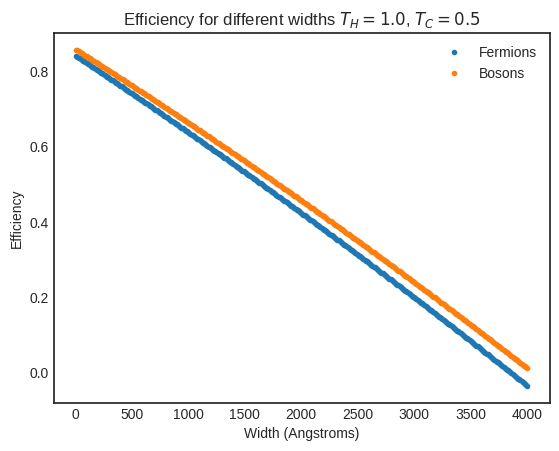

work_fermions=  1.3145734240020568e-09
entropy_fermions=  -3.7714058111696244e-08
work_bosons=  1.2176018934418426e-09
entropy_bosons=  -2.2692357751781853e-08
ratio=  0.9992482859974141


In [ ]:
#using the thermodynamical expression for the internal energy
def E(A,L):
    E = A/(L*L)
    return E
def B(k,T):
    B=1/(k*T)
    return B
def Z(A1,A2,Ef,k,T1,T2,L1,L2): #pairs: (L2, T2), (L1,T1), T1=hot temp bath
    Z = exp(-B(k,T1)*(E(A1,L1)-E(Ef,L1))) + exp(-B(k,T1)*(E(A2,L1)-E(Ef,L1))) + exp(-B(k,T2)*(E(A2,L2)-E(Ef,L2))) + exp(-B(k,T2)*(E(A1,L2)-E(Ef,L2)))
    return Z
def U_AB(A1,A2,Ef,k,T1,T2,L1,L2):
    U = (exp(-B(k,T1)*(E(A2,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A2,L1)-E(Ef,L1)) - (exp(-B(k,T1)*(E(A1,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A1,L1)-E(Ef,L1))
    return U
def U_BC(A1,A2,Ef,k,T1,T2,L1,L2):
    U = (exp(-B(k,T1)*(E(A2,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A2,L1)-E(Ef,L1)) - (exp(-B(k,T2)*(E(A2,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A2,L2)-E(Ef,L2))
    return U
def U_CD(A1,A2,Ef,k,T1,T2,L1,L2):
    U = (exp(-B(k,T2)*(E(A1,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A1,L2)-E(Ef,L2)) - (exp(-B(k,T2)*(E(A2,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A2,L2)-E(Ef,L2))
    return U
def U_DA(A1,A2,Ef,k,T1,T2,L1,L2):
    U = (exp(-B(k,T1)*(E(A1,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A1,L1)-E(Ef,L1)) - (exp(-B(k,T2)*(E(A1,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)) * (E(A1,L2)-E(Ef,L2))
    return U
def S_AB(A1,A2,Ef,k,T1,T2,L1,L2):
    S= -T1*k*( (exp(-B(k,T1)*(E(A2,L1)-E(Ef,L1)))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))*log(exp(-B(k,T1)*(E(A2,L1)-E(Ef,L1)))/(Z(A1,A2,Ef,k,T1,T2,L1,L2))) - ((exp(-B(k,T1)*(E(A1,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))*log((exp(-B(k,T1)*(E(A1,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2))) )
    return S
def S_CD(A1,A2,Ef,k,T1,T2,L1,L2):
    S= -T2*k*( (exp(-B(k,T2)*(E(A1,L2)-E(Ef,L2)))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))*log(exp(-B(k,T2)*(E(A1,L2)-E(Ef,L2)))/(Z(A1,A2,Ef,k,T1,T2,L1,L2))) - ((exp(-B(k,T2)*(E(A2,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))*log((exp(-B(k,T2)*(E(A2,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2))) )
    return S
def S_A(A1,A2,Ef,k,T1,T2,L1,L2):
    S= -T1*k*( ((exp(-B(k,T1)*(E(A1,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))*log((exp(-B(k,T1)*(E(A1,L1)-E(Ef,L1))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2))) )
    return S
def S_B(A1,A2,Ef,k,T1,T2,L1,L2):
    S= -T1*k*( (exp(-B(k,T1)*(E(A2,L1)-E(Ef,L1)))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))*log(exp(-B(k,T1)*(E(A2,L1)-E(Ef,L1)))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))  )
    return S
def S_C(A1,A2,Ef,k,T1,T2,L1,L2):
    S= -T2*k*(((exp(-B(k,T2)*(E(A2,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2)))*log((exp(-B(k,T2)*(E(A2,L2)-E(Ef,L2))))/(Z(A1,A2,Ef,k,T1,T2,L1,L2))) )
    return S
A_gsf=(5/2)*(((1.0545e-34)**2)*(math.pi)**2/((9.1093837e-31)*(1e-20))) *(6.242e18)
A_esf=2*A_gsf
A_gsb=(2/5)*A_gsf
A_esb=(5/2)*(((1.0545e-34)**2)*(math.pi)**2/((9.1093837e-31)*(1e-20))) *(6.242e18)
kb= 8.618011058000001e-05 #eV/K
Ef= (6/2)*A_gsf
Eb = (0.2)*A_gsf
L1=18000
L2=22000
Th=1.0
Tc=0.5
x=[]
y=[]
yb=[]

while L1<L2:
    L1=L1+10
    L=L1-18000
    x.append(L)
    w1 = -S_AB(A_gsf,A_esf,Ef,kb,Th,Tc,L1,L2)
    w2 = -U_BC(A_gsf,A_esf,Ef,kb,Th,Tc,L1,L2)
    w3 = -S_CD(A_gsf,A_esf,Ef,kb,Th,Tc,L1,L2)
    w4 = - U_DA(A_gsf,A_gsf,Ef,kb,Th,Tc,L1,L2)
    eff = -(w2-w4)/(w1)
    y.append(eff)
    w1b = -S_AB(A_gsb,A_esb,Eb,kb,Th,Tc,L1,L2)
    w2b = -U_BC(A_gsb,A_esb,Eb,kb,Th,Tc,L1,L2)
    w3b = -S_CD(A_gsb,A_esb,Eb,kb,Th,Tc,L1,L2)
    w4b = - U_DA(A_gsb,A_gsb,Eb,kb,Th,Tc,L1,L2)
    efb = -(w2b-w4b)/(w1b)
    yb.append(efb)


plt.figure()
plt.plot(x, y,label="Fermions",marker= ".",linestyle="")
plt.plot(x, yb,label="Bosons", marker= ".",linestyle="")
plt.xlabel('Width (Angstroms)')
plt.ylabel("Efficiency")
plt.legend()
plt.title("Efficiency for different widths $T_H=1.0$, $T_C=0.5$")
plt.show()
print("work_fermions= ",-U_BC(A_gsf,A_esf,Ef,kb,Th,Tc,L1,L2)+ U_DA(A_gsf,A_gsf,Ef,kb,Th,Tc,L1,L2))
print("entropy_fermions= ",S_AB(A_gsf,A_esf,Ef,kb,Th,Tc,L1,L2))
print("work_bosons= ",-U_BC(A_gsb,A_esb,Ef,kb,Th,Tc,L1,L2)+U_DA(A_gsb,A_esb,Ef,kb,Th,Tc,L1,L2))
print("entropy_bosons= ",S_AB(A_gsb,A_esb,Ef,kb,Th,Tc,L1,L2))
ratio=S_B(A_gsb,A_esb,Eb,kb,Th,Tc,L1,L2)/S_A(A_gsb,A_esb,Eb,kb,Th,Tc,L1,L2)
print("ratio= ",ratio)

In [ ]:
print(1.9e-10/4.54e-8)

0.004185022026431718
